In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob

In [2]:
data = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')
display(data)

data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

display(data)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<ipython-input-2-198c1471844f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Visualizing priority and frequency of words in messages using WordCloud[collocations excluded and included]

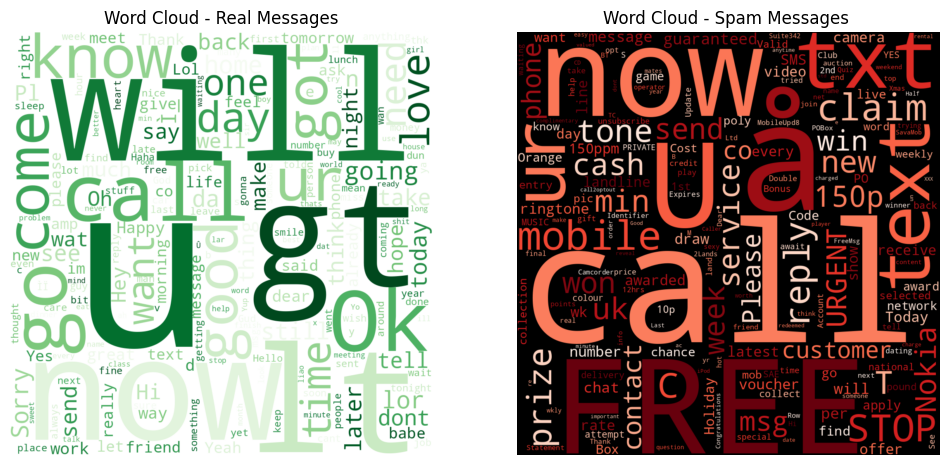

In [3]:
spam_words = ' '.join(list(data[data['label'] == 1]['message']))
spam_count = WordCloud(width=1024, height=1024, collocations=False,
                    colormap="Reds", background_color="black").generate(spam_words)

real_words = ' '.join(list(data[data['label'] == 0]['message']))
real_count = WordCloud(width=1024, height=1024, collocations=False,
                     colormap="Greens", background_color="white").generate(real_words)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(real_count, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Real Messages')

plt.subplot(1, 2, 2)
plt.imshow(spam_count, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Spam Messages ')

plt.show()


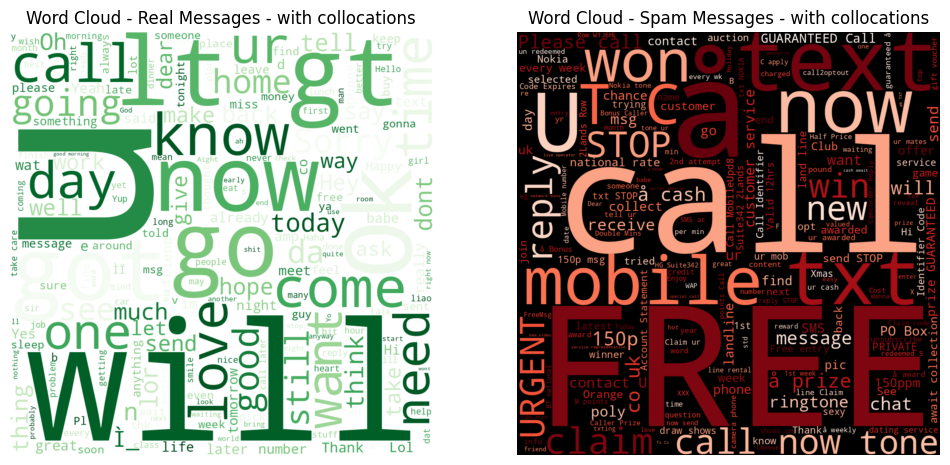

In [4]:
# spam_words = ' '.join(list(data[data['label'] == 1]['message']))
spam_count_2 = WordCloud(width=1024, height=1024, collocations=True,
                    colormap="Reds", background_color="black").generate(spam_words)

# real_words = ' '.join(list(data[data['label'] == 0]['message']))
real_count_2 = WordCloud(width=1024, height=1024, collocations=True,
                     colormap="Greens", background_color="white").generate(real_words)


plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(real_count_2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Real Messages - with collocations')

plt.subplot(1, 2, 2)
plt.imshow(spam_count_2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Spam Messages - with collocations')

plt.show()

Visualizing message length

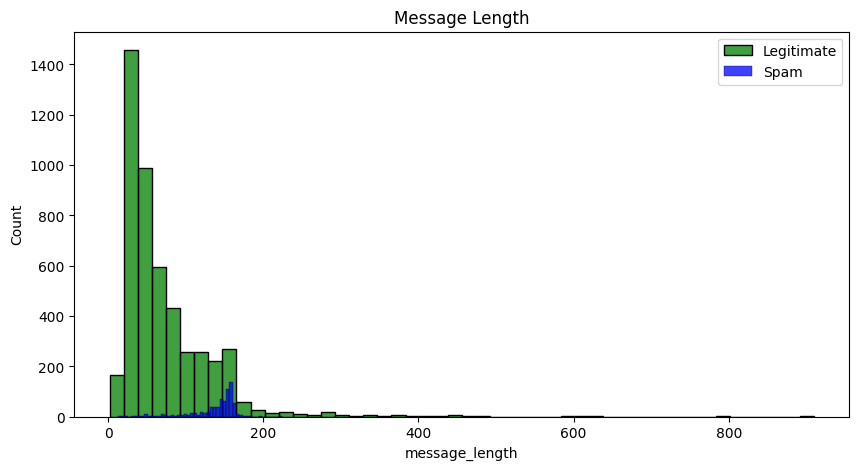

In [5]:

data['message_length'] = data['message'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data[data['label'] == 0]['message_length'],
             bins=50, color='green', label='Legitimate')
sns.histplot(data[data['label'] == 1]['message_length'],
             bins=50, color='blue', label='Spam')
plt.title('Message Length')
plt.legend()
plt.show()

Using tf-idf vectorization method to convert message text into vector values for better model training.

In [6]:
tv = TfidfVectorizer(stop_words='english')
x = tv.fit_transform(data['message'])
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy:  0.9417040358744395
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       954
           1       0.99      0.60      0.75       161

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.94      0.94      0.94      1115



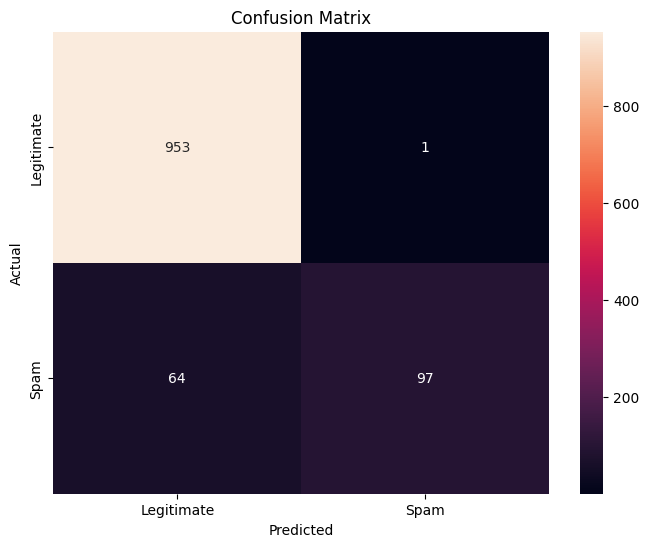

In [8]:
cnf_matrix=confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt="d", xticklabels=['Legitimate', 'Spam'], yticklabels=['Legitimate', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)

print("Naive Bayes Model Accuracy: ", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model Accuracy:  0.9605381165919282
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       1.00      0.73      0.84       161

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [12]:
from sklearn.svm import SVC

# Training
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

# Prediction and Evaluation
y_pred_svm = svm.predict(x_test)

print("SVM Model Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Model Accuracy:  0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.99      0.86      0.92       161

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

